## 1. Imports <a class='anchor' id='import'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, StratifiedKFold, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import tree, metrics
from IPython.display import Image  
import pydotplus


from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, f1_score, precision_recall_curve, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression


#from keras.utils.np_utils import to_categorical 
from keras.layers import Dense
from keras.models import Sequential
from sklearn import __version__ as sklearn_version


## 2. Load Data<a class='anchor' id='Load_Data'></a>

In [2]:
df = pd.read_csv("C:\\Users\\somfl\\Documents\\Data Science Career Track\\LendingClub\\LendingClubClean.csv")

## 3. Defining x and Y

The first try to model is using classification techniques 

In [3]:
# Defining X and y

y = df['Status']
X = df.drop(columns=['Status', 'id', 'Unnamed: 0', 'grade'])

## 4. Appplying One Hot Encoder to change the categorical columns

In [4]:
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(X)
categorical_columns

['sub_grade', 'term', 'emp_length', 'home_ownership']

In [5]:
# creating instance of one-hot-encoder

enc = OneHotEncoder(drop='first')
enc_df = pd.DataFrame(enc.fit_transform(X[categorical_columns]).toarray())
feature_names = enc.get_feature_names(input_features=categorical_columns)
enc_df.columns = feature_names
X.drop(columns=categorical_columns, inplace=True)
# merge with main df bridge_df on key values
X =X.join(enc_df)
#X.set_index('id', inplace=True)

## 5. Splitting the data to train and test groups

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

## 6. Scale the data

In [88]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 7. Model training 

### 7.1. Logistic regression

In [34]:
model=LogisticRegression(penalty='l2',C=0.01,solver='newton-cg')
model.fit(X_train_scaled,y_train)
pred_lr = model.predict(X_test_scaled)
accuracy_lr= accuracy_score(pred_lr,y_test)*100
print('Accuracy of Regularized Logistic Regression is: {:.2f}'.format(accuracy_lr))
print(classification_report(y_test, pred_lr))

Accuracy of Regularized Logistic Regression is: 78.76
              precision    recall  f1-score   support

     Default       0.56      0.08      0.14     78174
  Fully Paid       0.79      0.98      0.88    283314

    accuracy                           0.79    361488
   macro avg       0.68      0.53      0.51    361488
weighted avg       0.74      0.79      0.72    361488



### 7.1.2.  Make a pipeline

In [7]:
pipe = make_pipeline( 
    MinMaxScaler(),
    LogisticRegression()
)

### 7.1.3. Assessing performance using cross-validation

In [113]:
cv_results = cross_validate(pipe, X_train, y_train, cv=5)
cv_scores = cv_results['test_score']
cv_scores

C:\Users\somfl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\somfl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.788168  , 0.78791184, 0.78833865, 0.7879889 , 0.78752653])

### 7.1.4. Hyperparameter search using GridSearchCV

In [46]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'minmaxscaler', 'logisticregression', 'minmaxscaler__clip', 'minmaxscaler__copy', 'minmaxscaler__feature_range', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

In [50]:
grid_params = {'logisticregression__penalty': ['l1','l2'], 'logisticregression__C': [0.001,0.01,0.1,1,10,100,1000]}

In [51]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)
lr_grid_cv.fit(X_train, y_train)


C:\Users\somfl\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.78705018        nan 0.7875742         nan 0.78783977
        nan 0.78798441        nan 0.7880508         nan 0.78806385
        nan 0.78802591]
  warnings.warn(
C:\Users\somfl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000],
                         'logisticregression__penalty': ['l1', 'l2']})

In [114]:
lr_grid_cv.best_params_

{'logisticregression__C': 100, 'logisticregression__penalty': 'l2'}

### 7.1.5. The most important features in logistic Regression model

Now that we know the best hyperparameters for Logistic Regression, we will model with the best parameteres and look at the cofficients of features.

In [8]:
model=LogisticRegression(penalty='l2',C=100,solver='newton-cg')
pipeLrBest = make_pipeline(MinMaxScaler(), model)
pipeLrBest.fit(X_train,y_train)
pred_lr = pipeLrBest.predict(X_test)
accuracy_lr= accuracy_score(pred_lr,y_test)*100
print('Accuracy of Regularized Logistic Regression is: {:.2f}'.format(accuracy_lr))
print(classification_report(y_test, pred_lr))

Accuracy of Regularized Logistic Regression is: 78.80
              precision    recall  f1-score   support

     Default       0.56      0.09      0.15     78174
  Fully Paid       0.80      0.98      0.88    283314

    accuracy                           0.79    361488
   macro avg       0.68      0.53      0.51    361488
weighted avg       0.75      0.79      0.72    361488



In [9]:
lrcoef =pd.DataFrame(model.coef_, columns=X.columns).T
lrcoef.reset_index()
lrcoef.columns=['Coefficient']

In [10]:
HO = lrcoef.loc['home_ownership_MORTGAGE':,:]
HO = pd.DataFrame({'Coefficient': HO.mean()})
HO.index = ['home_ownership']
Emp = lrcoef.loc['emp_length_10+ years':'emp_length_< 1 year', :]
Emp = pd.DataFrame({'Coefficient': Emp.mean()})
Emp.index = ['employment length']
Sub = lrcoef.loc['sub_grade_A2':'sub_grade_G5', :]
sub = pd.DataFrame({'Coefficient': lrcoef.loc['sub_grade_A2':'sub_grade_G5', :].mean()})
sub.index = ['sub_grade']
term = pd.DataFrame({'Coefficient': lrcoef.loc['term_ 60 months',:]})
term.index = ['term']

lrcoef = pd.concat([lrcoef.loc[:'Credit Length (year)',:], term, HO, Emp, sub])

Text(0, 0.5, 'Feature')

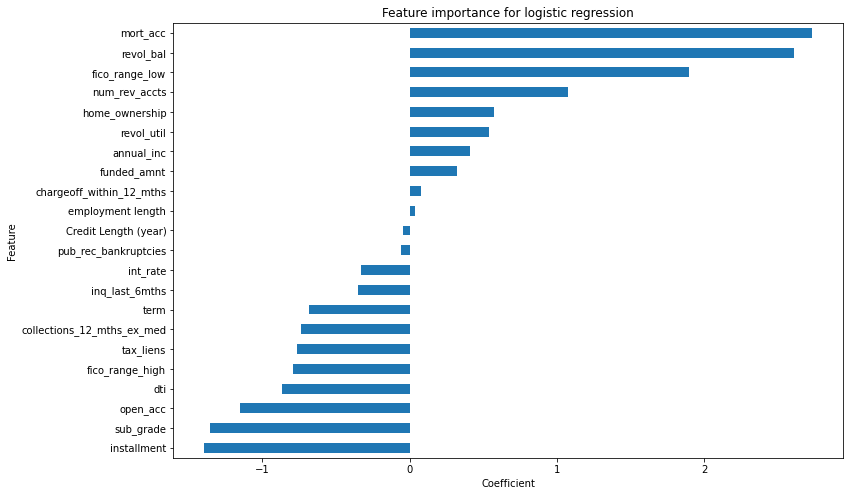

In [12]:
fig, ax=plt.subplots()
lrcoef.sort_values(by='Coefficient').iloc[:, lrcoef.columns.get_loc('Coefficient')].plot(kind='barh', figsize=(12,8), ax=ax)
ax.set_title('Feature importance for logistic regression')
ax.set_xlabel('Coefficient')
ax.set_ylabel('Feature')


### 7.2. Decision tree classifier: Entropy model - no max_depth
 


### 7.2.1. Fitting a decision tree to the data

In [104]:
# Made a model as before, but call it entr_model2, and make the max_depth parameter equal to 3. 
# Execute the fitting, predicting, and Series operations as before
entr_model2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth =3, random_state = 1234)

# Call fit() on entr_model
entr_model2.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model2.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred) 

# Check out entr_model
entr_model2

# Run this block for model evaluation 
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for Default' , metrics.precision_score(y_test,y_pred, pos_label = "Default"))
print('Recall score for Fully paid' , metrics.recall_score(y_test,y_pred, pos_label = "Fully Paid"))

Model Entropy model max depth 3
Accuracy: 0.783055454274255
Balanced accuracy: 0.5


C:\Users\somfl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score for Default 0.0
Recall score for Fully paid 1.0


### 7.2.2. Making a pipeline for decision tree

In [13]:
pipeTree = make_pipeline( 
    MinMaxScaler(),
    tree.DecisionTreeClassifier()
)

In [70]:
pipeTree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'minmaxscaler', 'decisiontreeclassifier', 'minmaxscaler__clip', 'minmaxscaler__copy', 'minmaxscaler__feature_range', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_impurity_split', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

In [72]:
grid_params = {'decisiontreeclassifier__criterion': ['gini', 'entropy'], 'decisiontreeclassifier__max_depth': [2, 3, 4, 6, 8, 10, 12]}

In [73]:
tree_grid_cv = GridSearchCV(pipeTree, param_grid=grid_params, cv=5, n_jobs=-1)
tree_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [2, 3, 4, 6, 8,
                                                               10, 12]})

In [74]:
tree_grid_cv.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 6}

After finding the best hyperparameters, we will fit a decision tree to the training data by using the best hyperparameters and then, we will look at the importance of the features.

In [14]:
BestTree = tree.DecisionTreeClassifier(criterion="gini", max_depth =6, random_state = 1234)
pipeTreeBest = make_pipeline(MinMaxScaler(), BestTree)
pipeTreeBest.fit(X_train, y_train)
y_pred = BestTree.predict(X_test)
y_pred = pd.Series(y_pred) 

print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for Default' , metrics.precision_score(y_test,y_pred, pos_label = "Default"))
print('Recall score for Fully paid' , metrics.recall_score(y_test,y_pred, pos_label = "Fully Paid"))

Accuracy: 0.7707752401186209
Balanced accuracy: 0.5647830768832519
Precision score for Default 0.4353165185716651
Recall score for Fully paid 0.9277727186090345


In [15]:
TreeFeatures =pd.DataFrame(BestTree.feature_importances_)
TreeFeatures.index=X.columns
TreeFeatures.columns=['Importance']

In [16]:
HO = TreeFeatures.loc['home_ownership_MORTGAGE':,:]
HO = pd.DataFrame({'Importance': HO.mean()})
HO.index = ['home_ownership']
Emp = TreeFeatures.loc['emp_length_10+ years':'emp_length_< 1 year', :]
Emp = pd.DataFrame({'Importance': Emp.mean()})
Emp.index = ['employment length']
Sub = TreeFeatures.loc['sub_grade_A2':'sub_grade_G5', :]
sub = pd.DataFrame({'Importance': Sub.mean()})
sub.index = ['sub_grade']
term = pd.DataFrame({'Importance': TreeFeatures.loc['term_ 60 months',:]})
term.index = ['term']

TreeFeatures = pd.concat([TreeFeatures.loc[:'Credit Length (year)',:], term, HO, Emp, sub])

Text(0, 0.5, 'Feature')

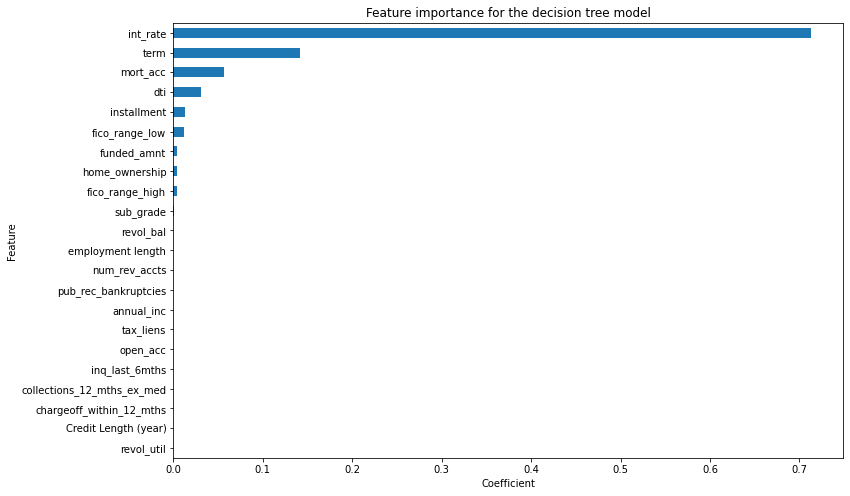

In [17]:
fig, ax=plt.subplots()
TreeFeatures.sort_values(by='Importance').iloc[:, TreeFeatures.columns.get_loc('Importance')].plot(kind='barh', figsize=(12,8))
ax.set_title('Feature importance for the decision tree model')
ax.set_xlabel('Coefficient')
ax.set_ylabel('Feature')


## 7.3. Random Forest

### 7.3.1. Random forest pipeline

In [7]:
pipeRF = make_pipeline(MinMaxScaler(), RandomForestClassifier(random_state=47))

In [19]:
rf_default_cv_results = cross_validate(pipeRF, X_train, y_train, cv=5)
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.78748629, 0.78688631, 0.78755024, 0.78732498, 0.78717678])

In [20]:
pipeRF.get_params()

{'memory': None,
 'steps': [('minmaxscaler', MinMaxScaler()),
  ('randomforestclassifier', RandomForestClassifier(random_state=47))],
 'verbose': False,
 'minmaxscaler': MinMaxScaler(),
 'randomforestclassifier': RandomForestClassifier(random_state=47),
 'minmaxscaler__clip': False,
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_impurity_split': None,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestcl

In [10]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [100, 200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3, 6]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1, 2]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'randomforestclassifier__n_estimators': n_estimators,
               'randomforestclassifier__max_features': max_features,
               'randomforestclassifier__max_depth': max_depth,
               'randomforestclassifier__min_samples_split': min_samples_split,
               'randomforestclassifier__min_samples_leaf': min_samples_leaf,
               'randomforestclassifier__bootstrap': bootstrap}


In [ ]:
rf_grid_cv  = GridSearchCV(pipeRF, param_grid = random_grid, cv = 5, n_jobs = -1)
rf_grid_cv.fit(X_train, y_train)
rf_grid_cv.best_params_

In [ ]:
param_grid = { 
    'n_estimators': [10,20,50],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [7,8,9,10,11,12,13,14,15],
    'criterion' :['gini', 'entropy']
}
rfc = RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_test, y_test)

## Neural Network

In [349]:
model = RandomForestClassifier(max_depth=6)
model.fit(X_train,y_train)
pred_lr = model.predict(X_test)
accuracy= accuracy_score(pred_lr,y_test)*100
print('Accuracy of RandomForestClassifier: {:.2f}'.format(accuracy))
print(classification_report(y_test, pred_lr))

Accuracy of RandomForestClassifier: 78.39


C:\Users\somfl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\somfl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Default       0.00      0.00      0.00     78056
  Fully Paid       0.78      1.00      0.88    283214

    accuracy                           0.78    361270
   macro avg       0.39      0.50      0.44    361270
weighted avg       0.61      0.78      0.69    361270



C:\Users\somfl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
from keras.utils.np_utils import to_categorical 
from keras.layers import Dense
from keras.models import Sequential

In [334]:
y = y.values.reshape(-1, 1)
enc = OneHotEncoder(drop='first')
y = enc.fit_transform(y).toarray()

In [322]:
X.shape

(1204233, 31)

In [248]:
X.head()

,revol_util,dti,chargeoff_within_12_mths,collections_12_mths_ex_med,inq_last_6mths,open_acc,mort_acc,annual_inc,funded_amnt,installment,...,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,id
0,29.7,5.91,0.0,0.0,1.0,7.0,1.0,55000.0,3600.0,123.03,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,68407277
1,19.2,16.06,0.0,0.0,4.0,22.0,4.0,65000.0,24700.0,820.28,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,68355089
2,64.5,25.37,0.0,0.0,3.0,12.0,6.0,104433.0,10400.0,289.91,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,68476807
3,68.4,10.20,0.0,0.0,0.0,5.0,0.0,34000.0,11950.0,405.18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,68426831
4,84.5,14.67,0.0,0.0,0.0,12.0,4.0,180000.0,20000.0,637.58,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,68476668


In [261]:
y

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]])

In [335]:
predictors = X.values
target = y

In [337]:
predictors.shape

(1204233, 65)

In [338]:
model = Sequential()
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(predictors, target, validation_split=0.3)

26343/26343 [==============================] - 73s 3ms/step - loss: 1.7680 - accuracy: 0.7728 - val_loss: 0.5280 - val_accuracy: 0.7792


In [307]:
y = df['sub_grade']
X = df[['fico_range_high', 'fico_range_low', 'annual_inc', 'dti', 'funded_amnt', 'Credit Length (year)' ]]

In [308]:
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(X)
categorical_columns
enc = OneHotEncoder(drop='first')
enc_df = pd.DataFrame(enc.fit_transform(X[categorical_columns]).toarray())
feature_names = enc.get_feature_names(input_features=categorical_columns)
enc_df.columns = feature_names
X.drop(columns=categorical_columns, inplace=True)
# merge with main df bridge_df on key values
X =X.join(enc_df)
#X.set_index('id', inplace=True)
y = y.values.reshape(-1, 1)
enc = OneHotEncoder()
y = enc.fit_transform(y).toarray()
predictors = X.values
target = y

C:\Users\somfl\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [309]:
X.shape[1]

6

In [310]:
y.shape[1]

35

In [311]:
model = Sequential()
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(35, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(predictors, target, validation_split=0.3)

26398/26398 [==============================] - 59s 2ms/step - loss: 3.9996 - accuracy: 0.0612 - val_loss: 3.1990 - val_accuracy: 0.0673
